### 3. Design a Customized DNN for Handwritten Digit Classification and train the model with MNIST Dataset.
### 4. Apply Data Augmentation in MNIST Dataset to compare the augmented dataset results with the original MNIST dataset.

*Importing required  packages*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

*load MNIST dataset and preprocess*

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


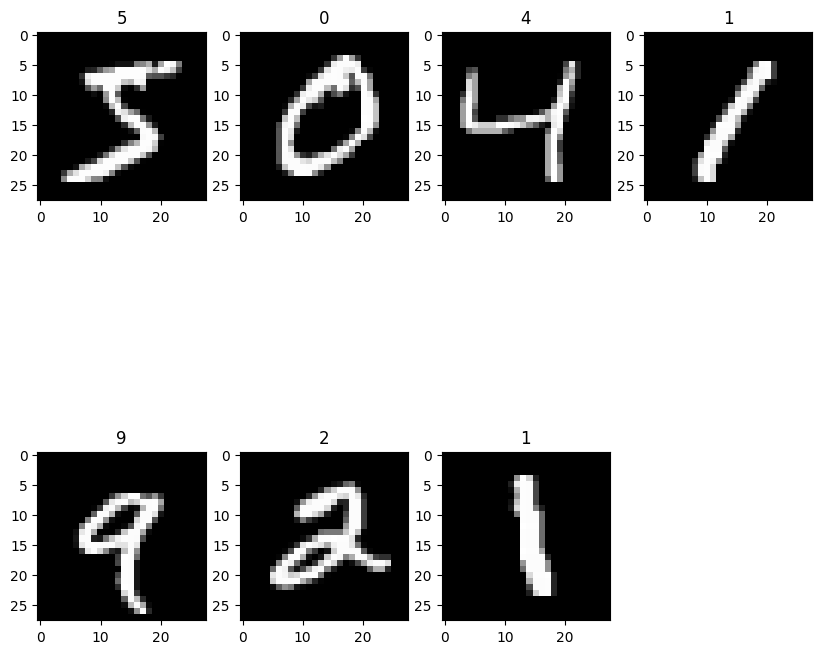

In [6]:
plt.figure(figsize=(10,10))
for i in range(0,7):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
plt.show()

data reshaping

In [7]:
# 2d-> 3d
x_train = x_train.reshape((x_train.shape[0], 28 , 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28 , 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


*One hot encoding*


In [8]:
y_train = to_categorical(y_train) # if image is 4 then y_train array index 4 is 1 other is 0
y_test = to_categorical(y_test )


*data normalization*

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

##Building the model

In [10]:
model1= Sequential([
        Flatten(input_shape=(28, 28, 1)), # channel 1 / gray scale
        Dense(512, activation = 'relu', name = "hidden_layer-1"),
        Dense(256, activation = 'relu', name = "hidden_layer-2"),
        Dense(128, activation = 'relu', name = "hidden_layer-3"),
        Dense(64, activation = 'relu', name = "hidden_layer-4"),
        Dense(10, activation = 'softmax', name = "output_layer") # 10 because 10 multi-layer output
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()
# For example, if you have 60,000 training samples and a batch size of 32, there will be 60,000/32 = 1875 batches in an epoch.
# In the example you mentioned, a batch size of 32 means that 32 training samples
# will be processed together before the model's weights are updated.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer-1 (Dense)      (None, 512)               401920    
                                                                 
 hidden_layer-2 (Dense)      (None, 256)               131328    
                                                                 
 hidden_layer-3 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer-4 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [11]:
model1.fit(x_train, y_train, epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2133 - accuracy: 0.9357
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0937 - accuracy: 0.9718
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0673 - accuracy: 0.9797
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9833
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9918
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9925
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [12]:
_,accuracy = model1.evaluate(x_test, y_test, verbose = 0)
print("Accuracy on Test dataset = ", format(accuracy*100,'.2f'),'%')

Accuracy on Test dataset =  98.15 %


## Data augmentation

In [15]:
# data augmentation used for increase dataset and diversity

datagen = ImageDataGenerator(
    rotation_range = 10,# 10% rotate
    zoom_range  = 0.2,# 20% zoom in and out
    width_shift_range = 0.1,# Specify the range of random horizontal and vertical shifts that can be applied to the images.
    height_shift_range = 0.1,
    shear_range = 0.1
)

datagen.fit(x_train)

In [16]:
model2= Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512, activation = 'relu', name = "hidden_layer-1"),
        Dense(256, activation = 'relu', name = "hidden_layer-2"),
        Dense(128, activation = 'relu', name = "hidden_layer-3"),
        Dense(64, activation = 'relu', name = "hidden_layer-4"),
        Dense(10, activation = 'softmax', name = "output_layer")
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden_layer-1 (Dense)      (None, 512)               401920    
                                                                 
 hidden_layer-2 (Dense)      (None, 256)               131328    
                                                                 
 hidden_layer-3 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer-4 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-tr

In [17]:
model2.fit(datagen.flow(x_train, y_train, batch_size=32), epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4192 - accuracy: 0.8675
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2035 - accuracy: 0.9375
Epoch 3/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1644 - accuracy: 0.9492
Epoch 4/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1474 - accuracy: 0.9551
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1318 - accuracy: 0.9601
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1220 - accuracy: 0.9626
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1158 - accuracy: 0.9652
Epoch 8/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1093 - accuracy: 0.9667
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1032 - accuracy: 0.9683
Epoch 10/20
1875/1875 [==============================] - 25s 13m

In [18]:
_,accuracy = model2.evaluate(x_test, y_test, verbose = 0)
print("Accuracy on Test dataset = ", format(accuracy*100,'.2f'),'%')

Accuracy on Test dataset =  98.75 %
